first install the yellowbrick

In [54]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Importing the important libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from yellowbrick.regressor import ResidualsPlot

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 7)

In [58]:
file_path = 'Advertising.csv'
df = pd.read_csv(file_path)

In [59]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [61]:
df.shape

(200, 4)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [63]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


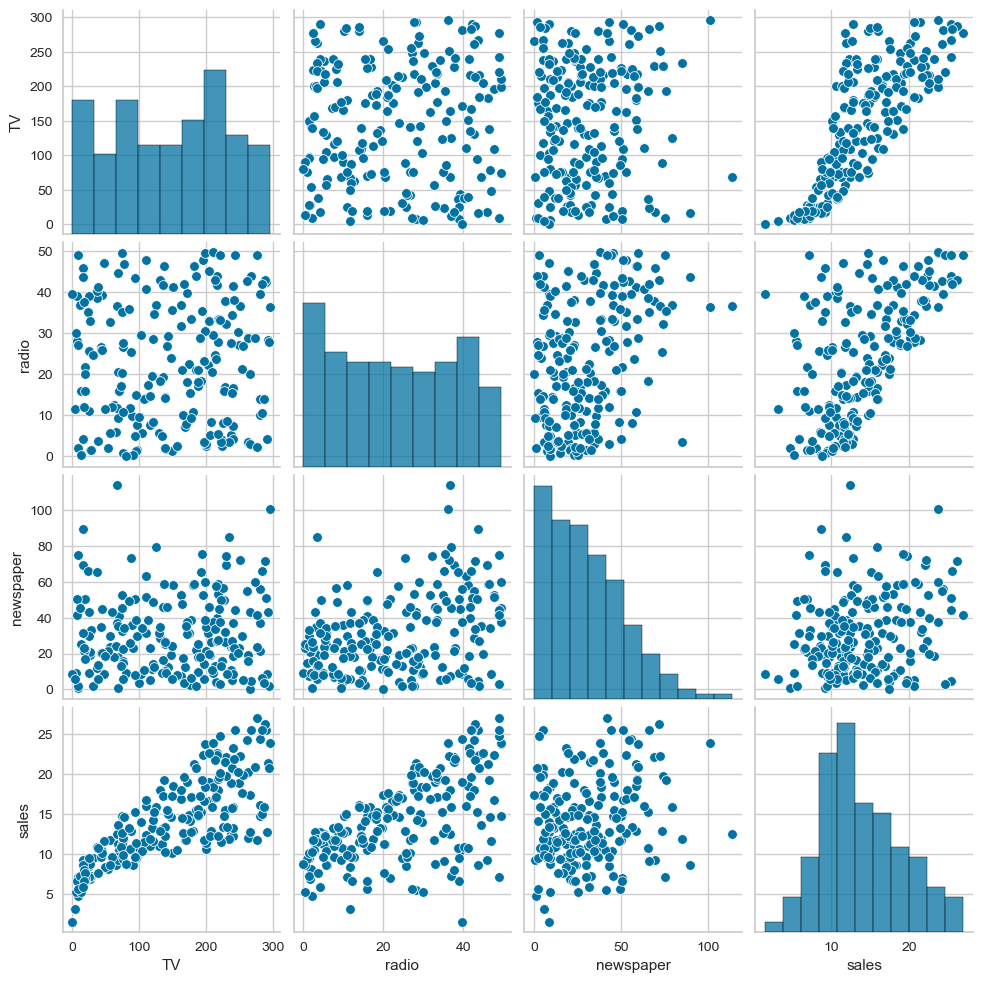

In [64]:
sns.pairplot(df)
plt.show()

In [65]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


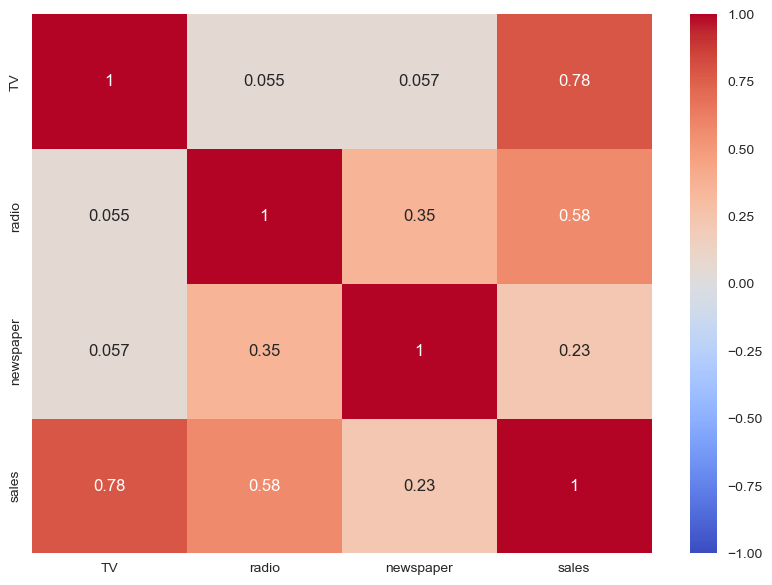

In [66]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [67]:
X = df.drop('sales', axis=1)
y = df['sales']

In [68]:
X.shape

(200, 3)

In [69]:
y.shape

(200,)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
df.sample(15)

,TV,radio,newspaper,sales
7,120.2,19.6,11.6,13.2
108,13.1,0.4,25.6,5.3
186,139.5,2.1,26.6,10.3
47,239.9,41.5,18.5,23.2
120,141.3,26.8,46.2,15.5
96,197.6,3.5,5.9,11.7
146,240.1,7.3,8.7,13.2
33,265.6,20.0,0.3,17.4
65,69.0,9.3,0.9,9.3
128,220.3,49.0,3.2,24.7


In [73]:
print('Train features shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test features shape: ', X_test.shape)
print('Test target shape: ', y_test.shape)

Train features shape:  (160, 3)
Train target shape:  (160,)
Test features shape:  (40, 3)
Test target shape:  (40,)


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(X_test)

In [78]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [79]:
X_train.head()

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [80]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [81]:
model.intercept_

2.979067338122631

In [82]:
X_test.loc[[95]]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [83]:
y_test.loc[95]

16.9

In [84]:
model.predict(X_test.loc[[95]])

array([16.4080242])

In [85]:
#Here we are comparing the values of the actual value before predicting from the model and the value that the model predict
my_dict = {'Actual': y_test, 'Pred': y_pred, 'Residual': y_test - y_pred, 'LSE': (y_test - y_pred)**2, 'ABS': abs(y_test - y_pred)}

In [86]:
compare = pd.DataFrame(my_dict)

In [87]:
compare.head()

,Actual,Pred,Residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627


In [88]:
#What I am doing here is that, i just want to take the actual, pred and residual values. So, I put : for the row value 
#because i want all the rows, then i just want the first three values, so What i did is that i wrote (:3) for the columns
#values to take only them
filtering = compare.iloc[:, :3]
filtering

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


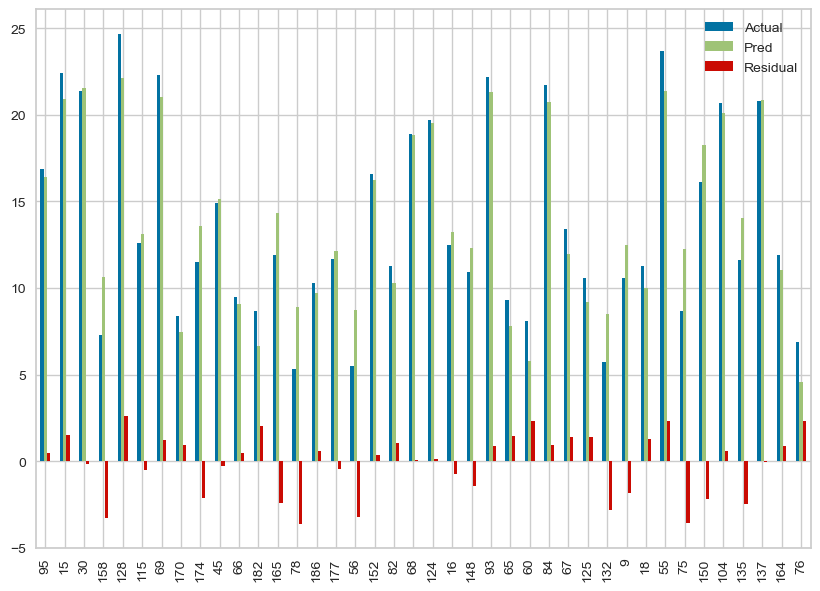

In [89]:
filtering.plot(kind='bar')
#filtering.plot(kind='bar', figsize=(15, 9)) 
#I can put the second one if i want to make the graph much bigger to see much clearer
plt.show()

Now we want to see the errr in our model by the error metrics

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [92]:
def metrics_cal(a, p):
    R2_score = r2_score(a, p)
    mae = mean_absolute_error(a, p)
    mse = mean_squared_error(a, p)
    rmse = np.sqrt(mean_squared_error(a, p))
    
    print('The R2 score is: ', R2_score)
    print('The mean absolute error is: ', mae)
    print('The mean squared error is: ', mse)
    print('The root mean squared error is: ', rmse)
    
    return None

In [93]:
metrics_cal(y_test, y_pred)

The R2 score is:  0.8994380241009121
The mean absolute error is:  1.4607567168117597
The mean squared error is:  3.1740973539761015
The root mean squared error is:  1.7815996615334495


In [94]:
sales_mean = df['sales'].mean()
sales_mean

14.0225

In [95]:
mae / sales_mean

0.10417234564533853

In [96]:
mse / sales_mean

0.226357450809492

In [97]:
rmse / sales_mean

0.12705292647769295

In [104]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    
    adj_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
    
    return adj_r2

In [105]:
adj_r2(y_test, y_pred, X)

0.8978988101840893

In [106]:
X.shape

(200, 3)

#Evaluate the model in the next step

In [107]:
def evaluate(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

    return None

In [108]:
evaluate(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.8994380241009121
MAE      : 1.4607567168117597
MSE      : 3.1740973539761015
RMSE     : 1.7815996615334495


In [109]:
#Here we are predicting or testing our model performance on the seen data which is the trained data to see how it will predict it.
y_train_pred = model.predict(X_train)

In [110]:
#Here we are seeing the metrics of the train predict values which we predict it from the trained data not the test one
metrics_cal(y_train, y_train_pred)

The R2 score is:  0.8957008271017817
The mean absolute error is:  1.1984678961500141
The mean squared error is:  2.7051294230814147
The root mean squared error is:  1.6447277656443375


In [111]:
residuals = y_test - y_pred

In [112]:
residuals

95     0.491976
15     1.510118
30    -0.153843
158   -3.308503
128    2.587627
115   -0.505592
69     1.242808
170    0.938990
174   -2.106346
45    -0.255070
66     0.451680
182    2.046717
165   -2.445545
78    -3.603493
186    0.610410
177   -0.464944
56    -3.236284
152    0.334927
82     1.022404
68     0.068909
124    0.139633
16    -0.751035
148   -1.436207
93     0.893049
65     1.472597
60     2.290426
84     0.942468
67     1.418619
125    1.416504
132   -2.806699
9     -1.866468
18     1.296623
55     2.312329
75    -3.549664
150   -2.166615
104    0.562337
135   -2.455140
137   -0.054112
164    0.882556
76     2.331004
Name: sales, dtype: float64

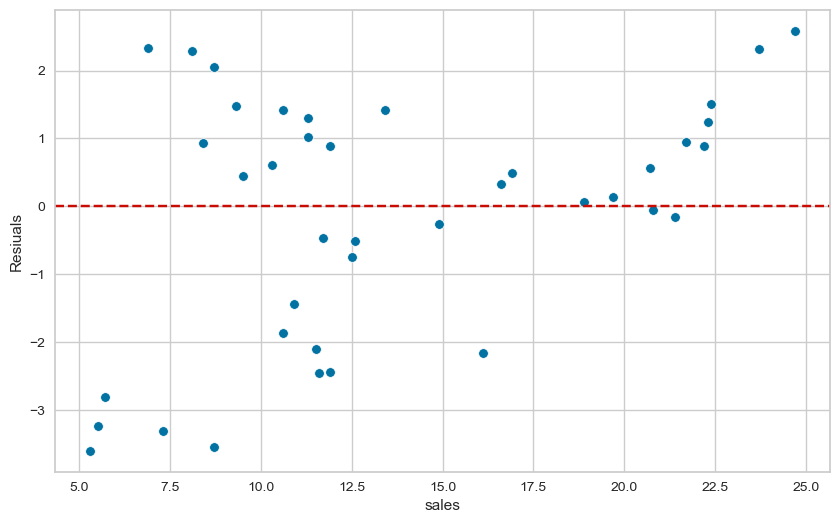

In [113]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.ylabel('Resiuals')
plt.show()

In [114]:
import scipy.stats as stats

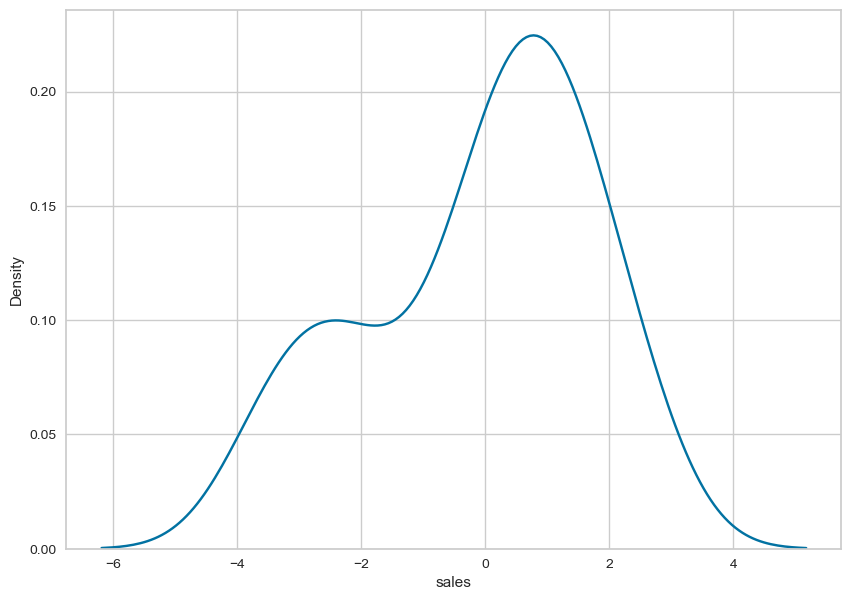

In [115]:
sns.kdeplot(residuals)
plt.show()

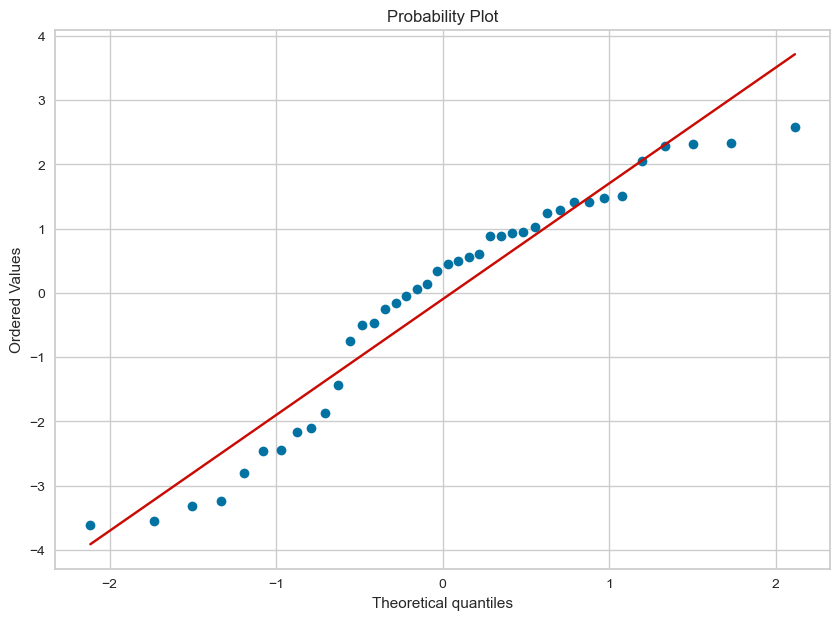

In [116]:
stats.probplot(residuals, dist='norm', plot=plt)
plt.show()

In [117]:
from scipy.stats import skew
skew(residuals)

-0.5399061927739789

In [118]:
from yellowbrick.regressor import ResidualsPlot

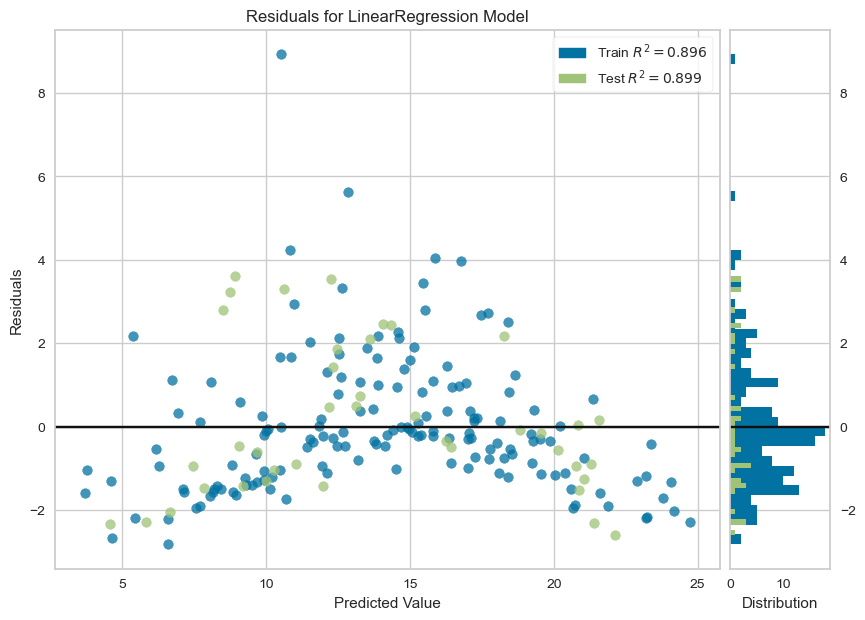

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [121]:
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [122]:
from yellowbrick.regressor import PredictionError

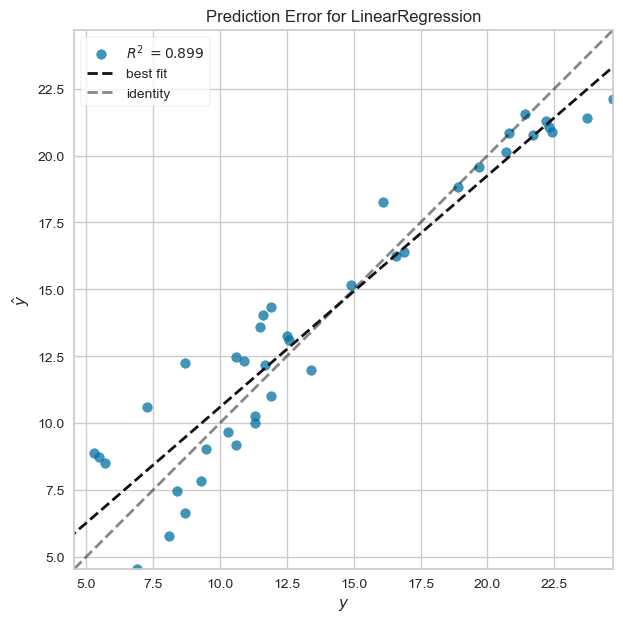

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [124]:
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [125]:
final_model = LinearRegression()

In [126]:
final_model.fit(X, y)

LinearRegression()

In [127]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [128]:
final_model.intercept_

2.9388893694594085

In [129]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [130]:
adv = [[150, 21, 12]]

In [131]:
adv

[[150, 21, 12]]

In [132]:
final_model.predict(adv)

array([13.75026663])

In [135]:
adv_1 =  [[100, 10, 12]]

In [136]:
final_model.predict(adv_1)

array([9.38820417])

In [137]:
adv_2 = [[200, 20, 30]]

In [138]:
final_model.predict(adv_2)

array([15.83129401])

In [139]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [140]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000
